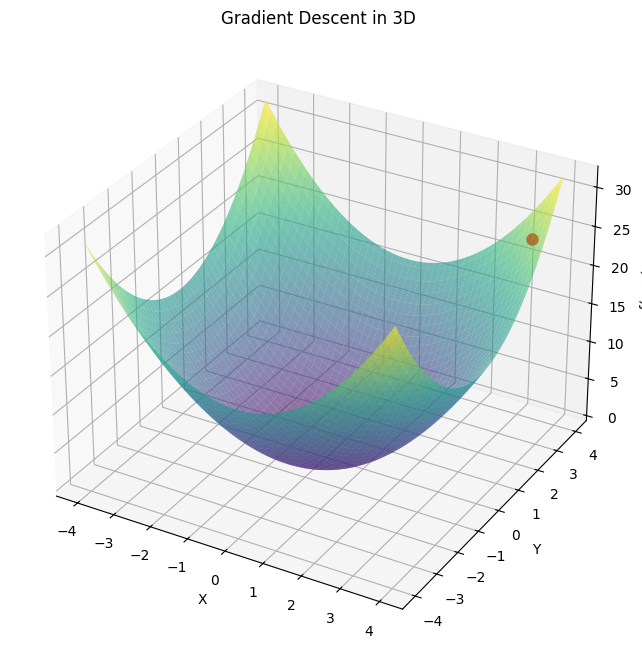

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

def f(x, y):
    return x**2 + y**2

def grad_f(x, y):
    return 2*x, 2*y

start_x, start_y = 3.5, 3.5
lr = 0.1
steps = 50

x_vals, y_vals, z_vals = [], [], []
x, y = start_x, start_y

for _ in range(steps):
    x_vals.append(x)
    y_vals.append(y)
    z_vals.append(f(x, y))
    dx, dy = grad_f(x, y)
    x -= lr * dx
    y -= lr * dy

X = np.linspace(-4, 4, 100)
Y = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f(x, y)')
ax.set_title('Gradient Descent in 3D')


point, = ax.plot([x_vals[0]], [y_vals[0]], [z_vals[0]], 'ro', markersize=8)
path, = ax.plot([], [], [], 'r-', linewidth=2)


def update(i):
    point.set_data([x_vals[i]], [y_vals[i]])
    point.set_3d_properties([z_vals[i]])
    path.set_data(x_vals[:i+1], y_vals[:i+1])
    path.set_3d_properties(z_vals[:i+1])
    return point, path

ani = FuncAnimation(fig, update, frames=len(x_vals), interval=300, blit=False)



In [2]:
from matplotlib.animation import FuncAnimation, PillowWriter


ani.save('data/gradient_descent.gif', writer=PillowWriter(fps=5))

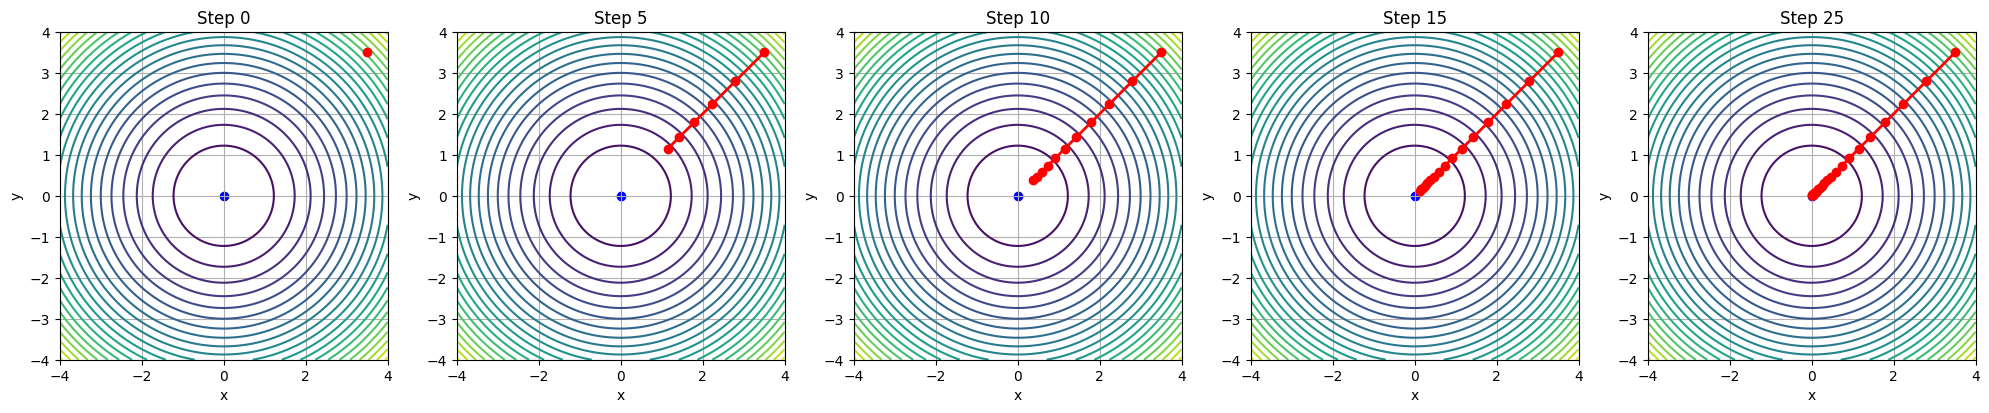

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
checkpoints = [0, 5, 10, 15, 25]
for i, step in enumerate(checkpoints):
    ax = axes[i]
    ax.contour(X, Y, Z, levels=30, cmap='viridis')
    ax.plot(x_vals[:step+1], y_vals[:step+1], 'ro-', linewidth=2)
    ax.scatter([0], [0], color='blue', label='Minimum')
    ax.set_title(f'Step {step}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()
